# DS-SF-36 | 14 | Trees | Assignment | Starter Code

In [7]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import tree, ensemble, metrics, model_selection, externals

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Today we are revisiting the `boston` dataset.

## Dataset documentation

The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - .63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

## Optional: Installing Graphviz

- macOS
  - Type `conda install graphviz` at the command line
- Windows
  - Download and install the MSI file: http://www.graphviz.org/Download_windows.php
  - Add it to your Path: Go to Control Panel, System, Advanced System Settings, Environment Variables.  Under system variables,edit "Path" to include the path to the "bin" folder, such as: C:\Program Files (x86)\Graphviz2.38\bin

In [10]:

from subprocess import Popen, PIPE
from IPython.core.display import display_svg
from IPython.core.magic import (
    Magics, magics_class,
    line_magic, line_cell_magic
)
from IPython.utils.warn import info, error

In [50]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-14-boston.csv'))

In [34]:
df

,CRIM,ZN,INDUS,CHAS,NOX,...,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,...,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,...,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,...,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,...,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,...,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,...,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,...,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,...,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,...,273,21.0,393.45,6.48,22.0


In [35]:
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'BLACK', u'LSTAT', u'MEDV'],
      dtype='object')

## Part A | Regression Decision Trees

> ### Question 1.  Create a feature matrix `X` with all features but `MEDV`.  Also create a response vector `y` with `MEDV`

In [51]:
df ['y'] = df['MEDV']

In [52]:
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'BLACK', u'LSTAT', u'MEDV', u'y'],
      dtype='object')

> ### Question 2.  Split the dataset into a training and testing sets (60%, 40%)

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.4)

In [60]:
len(test)

203

In [205]:
y_test = test.MEDV
X_test = test.drop('MEDV',1)
X_test = X_test.drop('y',1)


> ### Question 3.  Create a decision tree (`tree.DecisionTreeRegressor`) and train the model

- (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor)

In [83]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [96]:
#Checking the length of the dataset


print "Dataset Lenght:: ", len(train)
print "Dataset Shape:: ", train.shape
print "Dataset Lenght:: ", len(train)
print "Dataset Shape:: ", train.shape

y_train = train.MEDV
X_train = train.drop('MEDV',1)


Dataset Lenght::  303
Dataset Shape::  (303, 15)
Dataset Lenght::  303
Dataset Shape::  (303, 15)


In [97]:
X_train=X_train.drop('y',1)

In [98]:
X_train.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'BLACK', u'LSTAT'],
      dtype='object')

In [99]:
y_train

20     13.6
343    23.9
61     16.0
316    17.8
351    24.1
       ... 
253    42.8
298    22.5
272    24.4
240    22.0
6      22.9
Name: MEDV, Length: 303, dtype: float64

In [118]:
len(X_train)

303

In [119]:
len(y_train)

303

In [108]:
from sklearn import preprocessing
from sklearn import utils

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [124]:
X_train.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'BLACK', u'LSTAT'],
      dtype='object')

In [126]:
y_train

20     13.6
343    23.9
61     16.0
316    17.8
351    24.1
       ... 
253    42.8
298    22.5
272    24.4
240    22.0
6      22.9
Name: MEDV, Length: 303, dtype: float64

In [171]:
#Site used for reference - https://cambridgespark.com/content/tutorials/from-simple-regression-to-multiple-regression-with-decision-trees/index.html

In [130]:
X_train.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'BLACK', u'LSTAT'],
      dtype='object')

### starting brand new code here


In [181]:
#creating a regressor variable with 13 variables
regressor = DecisionTreeRegressor(max_depth=13)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [182]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [183]:
X_train.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'BLACK', u'LSTAT'],
      dtype='object')

In [185]:
from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


> ### Question 4.  What are the training and testing errors?

- (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error)

In [192]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, regressor.predict(X_train))

0.032893289328932894

In [186]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, X_train,
y_train, scoring='neg_mean_absolute_error', cv=10)

In [187]:
scores

array([ 2.37580645,  3.475     ,  2.96774194,  3.35027778,  2.875     ,
        3.04925926,  2.89833333,  3.17833333,  3.75666667,  4.635     ])

In [188]:
scores.mean()

3.2561418757467147

In [189]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, X_test,
y_test, scoring='neg_mean_absolute_error', cv=10)

In [190]:
scores

array([ 0.26190476,  0.56666667,  0.24761905,  0.42      ,  0.33      ,
        0.245     ,  0.225     ,  0.185     ,  0.43      ,  0.335     ])

In [191]:
scores.mean()

0.32461904761904753

Answer: TODO

> ### Question 5.  Retrain your model limiting the depth of the tree to 4

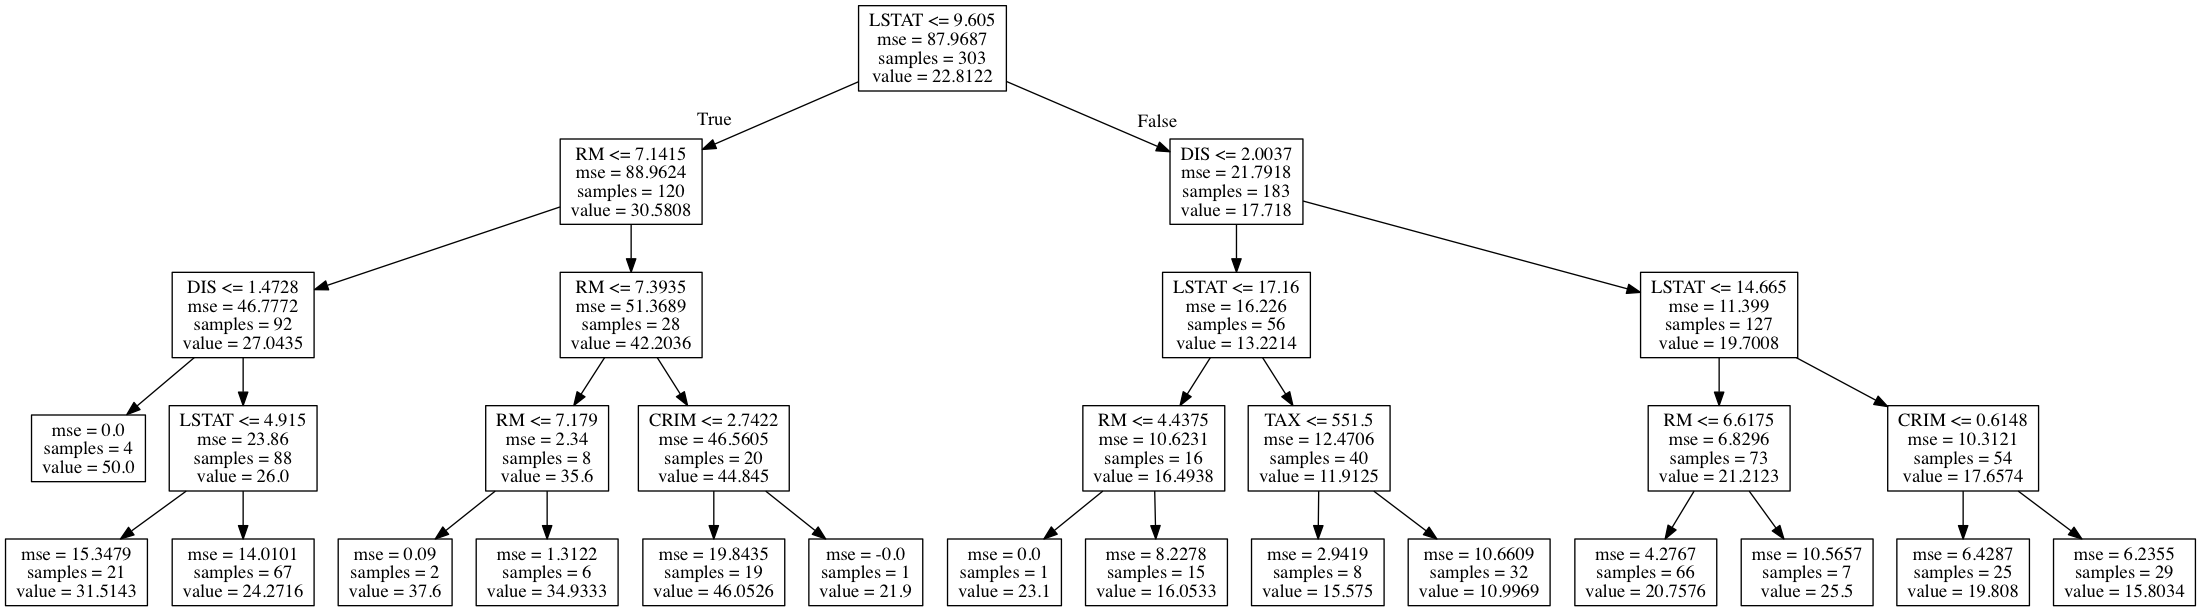

In [193]:
#creating a regressor variable with 13 variables
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)
regressor = DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

> ### Question 6.  Display graphically your model

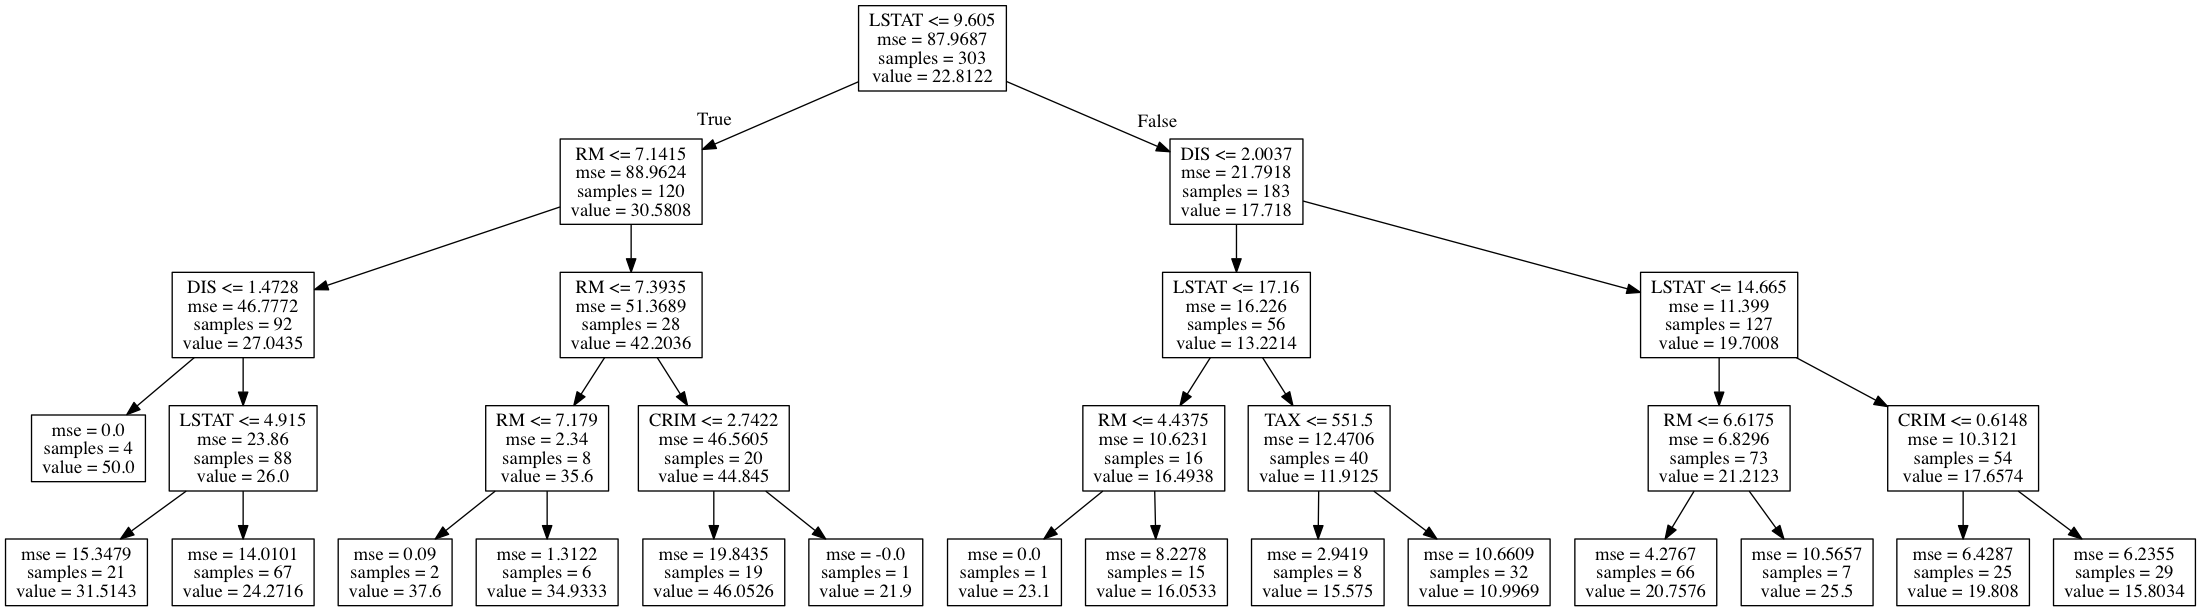

In [194]:

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

In [197]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, regressor.predict(X_train))

2.3346397319261101

In [206]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, regressor.predict(X_test))

2.8509354298268463

In [212]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, X_test,
y_test, scoring='neg_mean_absolute_error', cv=10)

In [211]:
scores

array([ 4.59452381,  2.70681223,  2.28552587,  4.98664361,  4.61779351,
        2.52604322,  3.66709631,  2.95724827,  2.52396226,  2.9723869 ])

> ### Question 7.  What are the top 3 most important features?

In [196]:
#The three most important features are LSTAT, RM and DIS

#LSTAT stands for % lower status of the population

#RM stands for average number of rooms per dwelling

#DIS stands for weighted distances to five Boston employment centers


Answer: TODO

## Part B | Classification Decision Trees

> ### Question 8.  Let's categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  Please create a new variable `MEDV_Category` that stores the level number

In [213]:
# Creating another variable than contains the classifier




> ### Question 9.  Create a feature matrix `X` with all features but `MEDV`.  Also create a response vector `y` with `MEDV_Category`

In [ ]:
# TODO

> ### Question 10.  Split again your dataset into a training and testing sets (60%, 40%)

In [ ]:
# TODO

> ### Question 11.  Create a decision tree (`tree.DecisionTreeClassifier`) of depth 2 and with leaf nodes having a minimum of 5 observations.  Then train the model model

- (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier)

In [ ]:
# TODO

> ### Question 12.  What is your 10-fold cross-validation error on your training set?

In [ ]:
# TODO

Answer: TODO

> ### Question 13.  Display graphically your model

In [ ]:
# TODO

> ### Question 14.  What are the features used by the model?

In [ ]:
# TODO

Answer: TODO

## Part C | Random Forest with Categorical Variables

> ### Question 15.  Create a Random Forest Classifier with `n_estimators = 1000, max_features = 4, min_samples_leaf = 5, oob_score = True`

- (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier)

In [ ]:
# TODO

> ### Question 16.  What is the Out-of-Bag (OOB) error?

(Out-of-Bag (OOB) error, also called "out-of-bag estimate", is a method of measuring the prediction error of random forestswhen sub-sample data was used for training.  OOB is the mean prediction error on each training sample $x_i$, using only the trees that did not have $x_i$ in their bootstrap sample)

In [ ]:
# TODO

Answer: TODO

> ### Question 17.  What is your 10-fold cross-validation error on your training set?

In [ ]:
# TODO

Answer: TODO